<a href="https://colab.research.google.com/github/AnshulSharma2004/MachineLearning/blob/main/DenseLayer_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install nnfs

In [21]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
import matplotlib.pyplot as plt

In [22]:
class DenseLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size)
        self.biases = np.zeros(output_size)
    def forward(self, x):
        return np.dot(x, self.weights) + self.biases

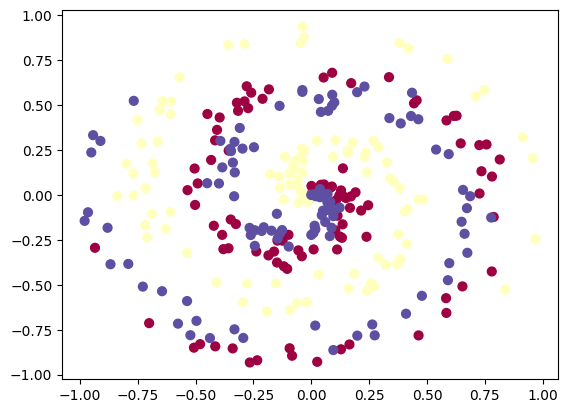

In [23]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
dense1 = DenseLayer(input_size=2, output_size=5)
output1 = dense1.forward(X)
print(output1)

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00]
 [-8.3581591e-03 -7.9040425e-03 -1.3345222e-02  4.6550445e-03
   4.5684614e-04]
 [-2.3999445e-02  5.9346925e-04 -2.2480827e-02  2.0357310e-03
   6.1002434e-03]
 ...
 [ 1.1329151e+00 -1.8926227e+00 -2.0685506e-01  8.1107962e-01
  -6.7135078e-01]
 [ 1.3458836e+00 -1.4319782e+00  3.0949396e-01  5.6633753e-01
  -6.2968737e-01]
 [ 1.0781792e+00 -2.0080962e+00 -3.3757931e-01  8.7256193e-01
  -6.8145877e-01]]


In [ ]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [ ]:
print(np.sum(a))

45


In [ ]:
res1 = np.sum(a, axis=0)
print(res1)
print(res1.shape)
res1 = res1.reshape(-1,1)
print(res1)
print(res1.shape)

[12 15 18]
(3,)
[[12]
 [15]
 [18]]
(3, 1)


In [ ]:
res2 = np.sum(a, axis=1)
print(res2)
print(res2.shape)
res2 = res2.reshape(-1,1)
print(res2)
print(res2.shape)

[ 6 15 24]
(3,)
[[ 6]
 [15]
 [24]]
(3, 1)


In [ ]:
res3 = np.sum(a, axis=0, keepdims=True)
print(res3)
print(res3.shape)
res3 = res3.reshape(-1,1)
print(res3)
print(res3.shape)

[[12 15 18]]
(1, 3)
[[12]
 [15]
 [18]]
(3, 1)


In [ ]:
res4 = np.sum(a, axis=1, keepdims=True)
print(res4)
print(res4.shape)
res4 = res4.reshape(1,-1)
print(res4)
print(res4.shape)

[[ 6]
 [15]
 [24]]
(3, 1)
[[ 6 15 24]]
(1, 3)


In [ ]:
b = np.array([1,2,3])
print(b.shape)
print(b)

(3,)
[1 2 3]


In [ ]:
b = np.expand_dims(b,axis=0)
print(b.shape)
print(b)

(1, 3)
[[1 2 3]]


In [ ]:
c = np.array([1,2,3])
print(c.shape)
print(c)
c = np.expand_dims(c,axis=1)
print(c.shape)
print(c)

(3,)
[1 2 3]
(3, 1)
[[1]
 [2]
 [3]]


In [ ]:
res = np.concatenate([a,b], axis = 0)
print(res)

[[1 2 3]
 [4 5 6]
 [7 8 9]
 [1 2 3]]


In [ ]:
res5 = np.concatenate([a,c], axis = 1)
print(res5)

[[1 2 3 1]
 [4 5 6 2]
 [7 8 9 3]]


In [24]:
class Relu_Activation:
    def forward(self, x):
        return np.maximum(0,x)
class Softmax_Activation:
    def forword(self, x):
        exp = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp / np.sum(exp, axis=1, keepdims=True)

In [25]:
hidden1 = DenseLayer(input_size=2, output_size=5)
relu1 = Relu_Activation()
output1 = relu1.forward(hidden1.forward(X))
hidden2 = DenseLayer(input_size=5, output_size=3)
softmax = Softmax_Activation()
output2 = hidden2.forward(output1)
res = softmax.forword(output2)

In [28]:
class Loss:
    'Calculates the data and regularization losses given model output and ground truth values'

    def calculate(self, output, y):
        'Calculate sample losses'
        sample_losses = self.forward(output, y)

        # Calculate mean loss
        data_loss = np.mean(sample_losses)

        # Return loss
        return data_loss


class Loss_CategoricalCrossentropy(Loss):
    'Cross-entropy loss'

    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)

        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        # Probabilities for target values - only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)

        return negative_log_likelihoods


In [29]:
loss_function = Loss_CategoricalCrossentropy()
print(loss_function.calculate(res, y))

1.196015
